In [25]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START, END
from pydantic import BaseModel
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
# Set Groq API key
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# Initialize the LLM
llm = ChatGroq(model="deepseek-r1-distill-llama-70b")


In [26]:
class State(BaseModel):
    topic: str
    current_news: str = ""
    history_news: str = ""
    logic: str = ""
    combined_output: str = ""

# Define node functions
def call_llm1(state: State):
    """Get current news based on topic"""
    msg = llm.invoke(f"Get current news about {state.topic}")
    return {"current_news": msg.content}

def call_llm2(state: State):
    """Get history news based on topic"""
    msg = llm.invoke(f"Get historical news about {state.topic}")
    return {"history_news": msg.content}

def call_llm3(state: State):
    """Get logic-based insights based on topic"""
    msg = llm.invoke(f"Give logical insights about the topic {state.topic}")
    return {"logic": msg.content}

def aggregate_news(state: State):
    """Aggregate all news responses into one output"""
    combined = (
        f"Current news: {state.current_news}\n"
        f"Historical news: {state.history_news}\n"
        f"Logical insights: {state.logic}"
    )
    msg = llm.invoke(f"Combine and summarize the following:\n{combined}")
    return {"combined_output": msg.content}


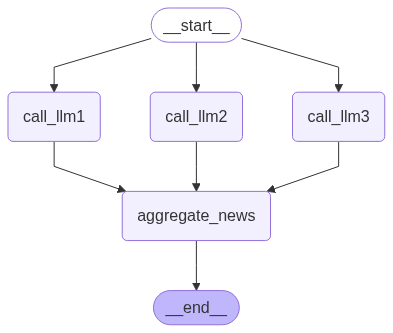

<think>
Okay, so I'm trying to understand the H1B visa process in the USA. I've heard a lot about it, especially from friends who work in tech, but I'm not really clear on the details. Let me start by breaking it down step by step.

First, I know that H1B is a work visa, but what exactly does it entail? I think it's for specialized jobs, maybe like IT or engineering. So, the employer must be the one to sponsor the visa, right? That makes sense because they need to petition for the employee.

Wait, so the employer has to file a petition with USCIS. What does that involve? I remember something about a labor certification. Oh, right, the LCA, Labor Condition Application. The employer has to get that approved first. I think the LCA is about ensuring that the worker will be paid the correct wage and work under good conditions. So, they have to file that with the Department of Labor before anything else.

After the LCA is approved, the employer can then file the H1B petition. There's a form 

In [27]:
# Build parallel graph
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm1", call_llm1)
parallel_builder.add_node("call_llm2", call_llm2)
parallel_builder.add_node("call_llm3", call_llm3)
parallel_builder.add_node("aggregate_news", aggregate_news)

# Define edges
parallel_builder.add_edge(START, "call_llm1")
parallel_builder.add_edge(START, "call_llm2")
parallel_builder.add_edge(START, "call_llm3")
parallel_builder.add_edge("call_llm1", "aggregate_news")
parallel_builder.add_edge("call_llm2", "aggregate_news")
parallel_builder.add_edge("call_llm3", "aggregate_news")
parallel_builder.add_edge("aggregate_news", END)

# Compile and visualize
parallel_workflow = parallel_builder.compile()
#graph = parallel_builder.build()

# Visualize graph (only works in Jupyter or compatible environments)
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

# Run the graph with a topic
output_state = parallel_workflow.invoke({"topic": "H1visa process in usa"})
print(output_state["combined_output"])



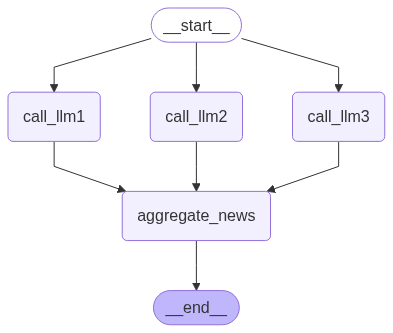

<think>
Alright, so I need to figure out the H1B visa process in the USA. I know that H1B is a work visa, but I'm not exactly sure about the steps involved. Let me start by recalling what I know.

First, I think the process begins with a US employer because they have to sponsor the visa. So the employer must be willing to hire a foreign worker. I remember hearing about the Labor Condition Application (LCA). I think the employer has to file that with the Department of Labor. The LCA probably has something to do with ensuring that the foreign worker is paid fairly and works in good conditions. Maybe it's about wage requirements and working conditions.

After the LCA is approved, the next step is filing the actual H1B petition. I believe this is done with USCIS, the U.S. Citizenship and Immigration Services. The form used is I-129, right? So the employer submits Form I-129 along with supporting documents. What kind of documents? Maybe proof of the employer's business, the job offer, the e

In [19]:
from pydantic import BaseModel
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from IPython.display import Image
import os
from dotenv import load_dotenv
load_dotenv()

# Set Groq API key
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# Initialize the LLM
llm = ChatGroq(model="deepseek-r1-distill-llama-70b")

# Define the state using Pydantic BaseModel
class State(BaseModel):
    topic: str
    current_news: str = ""
    history_news: str = ""
    logic: str = ""
    combined_output: str = ""

# Define node functions
def call_llm1(state: State):
    """Get current news based on topic"""
    msg = llm.invoke(f"Get current news about {state.topic}")
    return {"current_news": msg.content}

def call_llm2(state: State):
    """Get history news based on topic"""
    msg = llm.invoke(f"Get historical news about {state.topic}")
    return {"history_news": msg.content}

def call_llm3(state: State):
    """Get logic-based insights based on topic"""
    msg = llm.invoke(f"Give logical insights about the topic {state.topic}")
    return {"logic": msg.content}

def aggregate_news(state: State):
    """Aggregate all news responses into one output"""
    combined = (
        f"Current news: {state.current_news}\n"
        f"Historical news: {state.history_news}\n"
        f"Logical insights: {state.logic}"
    )
    msg = llm.invoke(f"Combine and summarize the following:\n{combined}")
    return {"combined_output": msg.content}

# Build parallel graph
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm1", call_llm1)
parallel_builder.add_node("call_llm2", call_llm2)
parallel_builder.add_node("call_llm3", call_llm3)
parallel_builder.add_node("aggregate_news", aggregate_news)

# Define edges
parallel_builder.add_edge(START, "call_llm1")
parallel_builder.add_edge(START, "call_llm2")
parallel_builder.add_edge(START, "call_llm3")
parallel_builder.add_edge("call_llm1", "aggregate_news")
parallel_builder.add_edge("call_llm2", "aggregate_news")
parallel_builder.add_edge("call_llm3", "aggregate_news")
parallel_builder.add_edge("aggregate_news", END)

# Compile and visualize
parallel_workflow = parallel_builder.compile()
#graph = parallel_builder.build()

# Visualize graph (only works in Jupyter or compatible environments)
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

# Run the graph with a topic
output_state = parallel_workflow.invoke({"topic": "H1visa process in usa"})
print(output_state["combined_output"])
